In [1]:
import numpy as np
import skimage
import math 

In [2]:
def Gaussian_Smooting_Filter(image,size = (3,3), sigma=1 ):
    output = np.zeros(size)
    h = (size[0]-1)/2
    w = (size[1]-1)/2
    for i in range(size[0]):
        for j in range(size[1]):
            output[i,j] = (1/(2*math.pi*(sigma**2)))*math.exp(-((i-h)**2+(j-w)**2)/(2*sigma**2))
    image_size = image.shape
    new = np.zeros([image_size[0], image_size[1]])
    for i in range(1, image_size[0] - 1):
        for j in range(1, image_size[1] -1):
            new[i, j] = np.sum(np.multiply(image[i - 1 : i +2, j - 1 : j +2], output))
    
    return new

In [3]:
def Gaussian_Filter_rb0(data,k_size = (3,3), sigma = 1):
    
    k_height = (k_size[0]-1)/2
    k_width = (k_size[1]-1)/2
    mask = np.zeros(k_size)
    for i in range(k_size[0]):
        for j in range(k_size[1]):
            mask[i,j] = (1/(2*math.pi*(sigma**2)))*math.exp(-((i-k_height)**2+(j-k_width)**2)/(2*sigma**2))
            
    img= np.array(data)
    height, width = img.shape

    img_new = np.zeros([height, width])
    for i in range(height-k_size[0]+1):
        for j in range(width-k_size[1]+1):
            img_new[i,j] = np.sum(img[i:i+k_size[0],j:j+k_size[1]]*mask)
                  
    
    return img_new

In [4]:
def median_filter(image, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data= np.array(image)
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
            
            
    return data_final

In [5]:
def sharpen_filter(data):     
    img= np.array(data)

    height, width = img.shape
    
    # Develop Averaging filter(3, 3) mask
    mask = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    mask = mask / 9
    
    # Convolve the 3X3 mask over the image
    img_new = np.zeros([height, width])
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            
            img_new[i, j]= temp
    
       
    
    return img_new

In [6]:
def sobel_filter(data):     
    img= np.array(data)

    height, width = img.shape
    
    # Develop Averaging filter(3, 3) mask
    masky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    masky = masky / 9
    maskx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    maskx = maskx / 9
    
    
    convolved = np.zeros(img.shape)
    # Convolve the 3X3 mask over the image
    img_newx = np.zeros([height, width])
    img_newy = np.zeros([height, width])
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            tempx = img[i-1, j-1]*maskx[0, 0]+img[i-1, j]*maskx[0, 1]+img[i-1, j + 1]*maskx[0, 2]+img[i, j-1]*maskx[1, 0]+ img[i, j]*maskx[1, 1]+img[i, j + 1]*maskx[1, 2]+img[i + 1, j-1]*maskx[2, 0]+img[i + 1, j]*maskx[2, 1]+img[i + 1, j + 1]*maskx[2, 2]  
            img_newx[i, j]= tempx
            
            tempy = img[i-1, j-1]*masky[0, 0]+img[i-1, j]*masky[0, 1]+img[i-1, j + 1]*masky[0, 2]+img[i, j-1]*masky[1, 0]+ img[i, j]*masky[1, 1]+img[i, j + 1]*masky[1, 2]+img[i + 1, j-1]*masky[2, 0]+img[i + 1, j]*masky[2, 1]+img[i + 1, j + 1]*masky[2, 2]
            img_newy[i, j]= tempy
    
    
    G = np.hypot(img_newx, img_newy)
    G = G / G.max() * 255
    
    
    theta = np.arctan2(img_newy, img_newx)
    
    return (G, theta)
    
    


In [7]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [8]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [9]:
def hysteresis(img, weak, strong=255):
    
    M, N = img.shape  
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    
    return img

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [10]:
from PIL import Image 
images = []


images.append(Image.open('lena.jpg'))
images.append(Image.open('giant.jpg'))
images.append(Image.open('spy.jpg'))
images.append(Image.open('dark_book.jpg'))


# load image


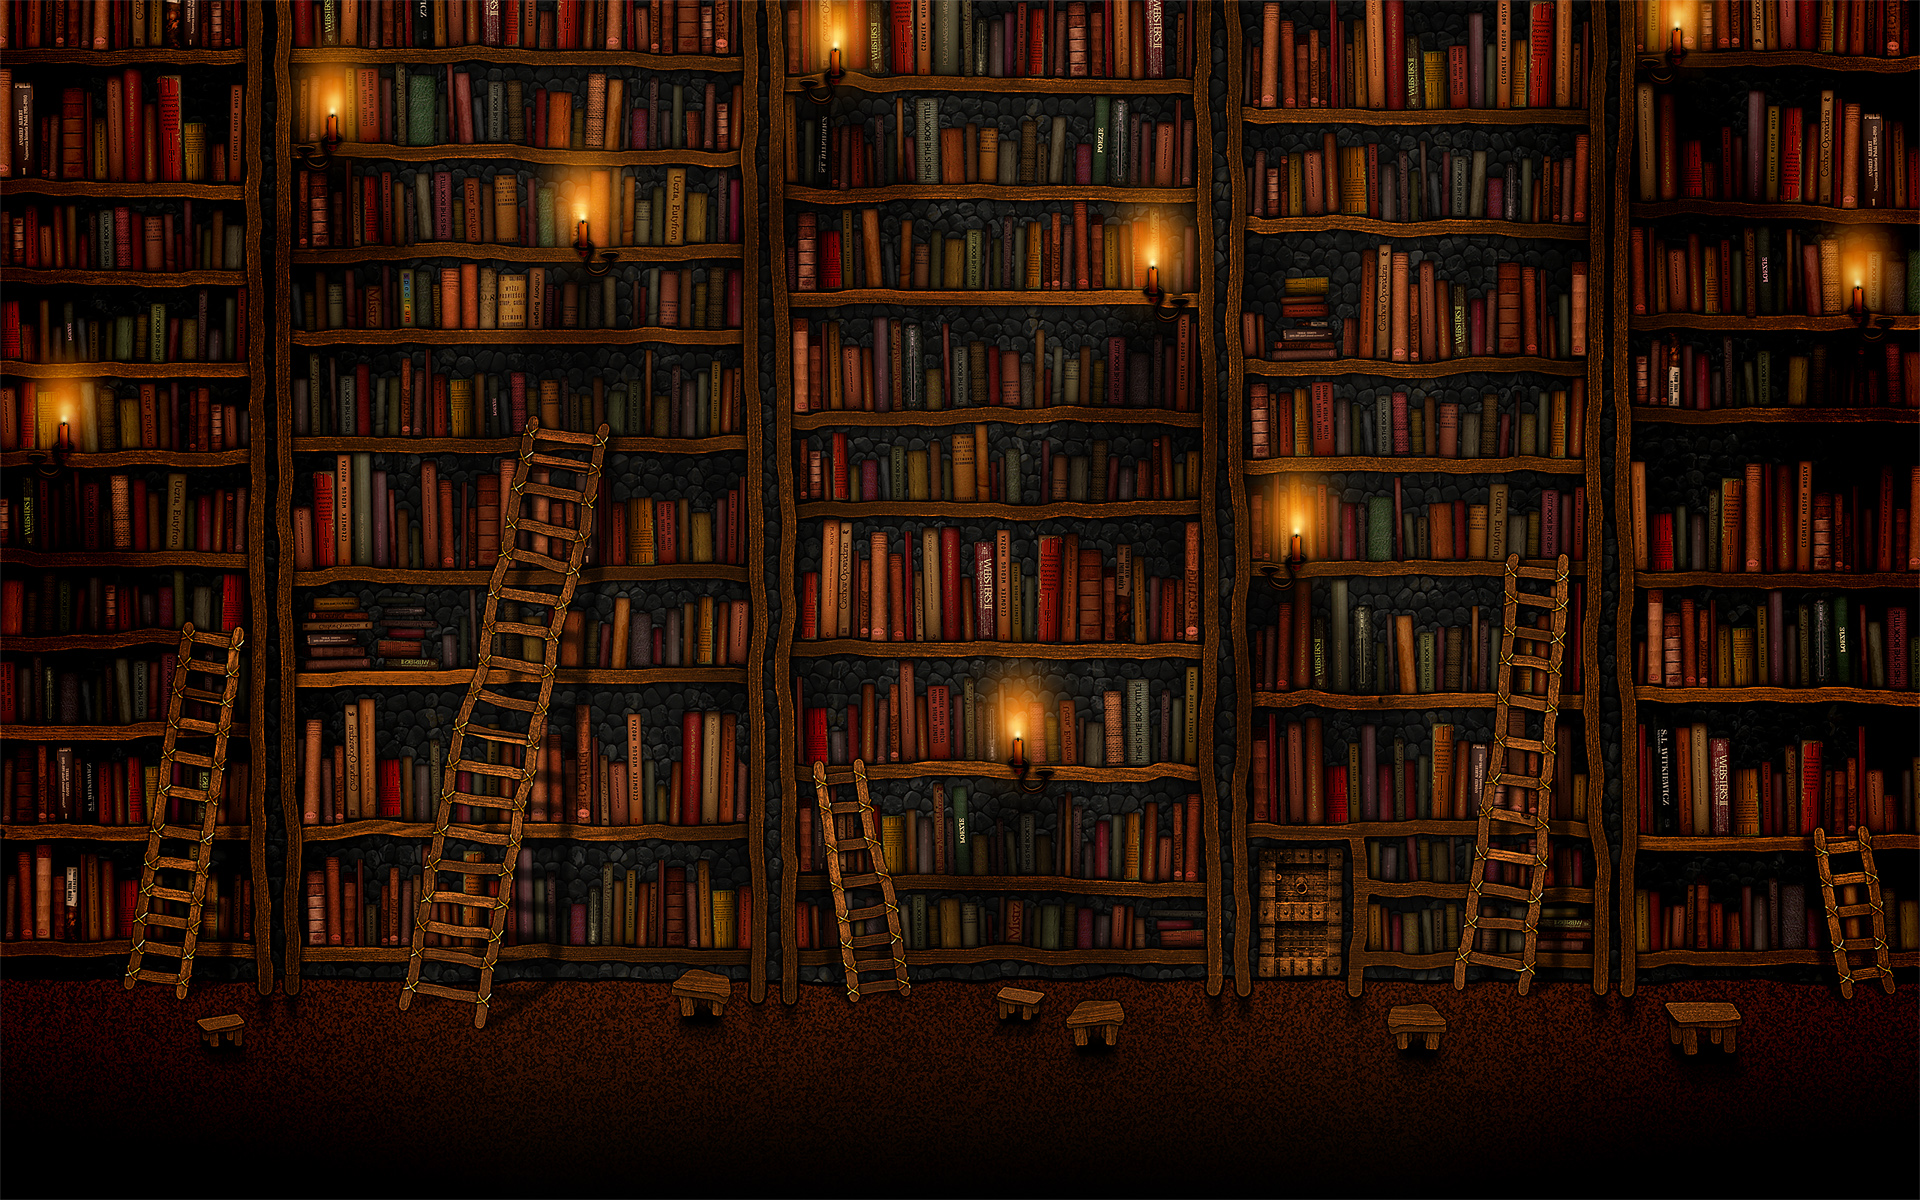

In [11]:
images[3]

In [12]:
img_gray= []
img_gray0= skimage.color.rgb2gray(images[0])
img_gray1= skimage.color.rgb2gray(images[1])
img_gray2= skimage.color.rgb2gray(images[2])
img_gray3= skimage.color.rgb2gray(images[3])

In [13]:
#img = skimage.color.rgb2gray(images[2])

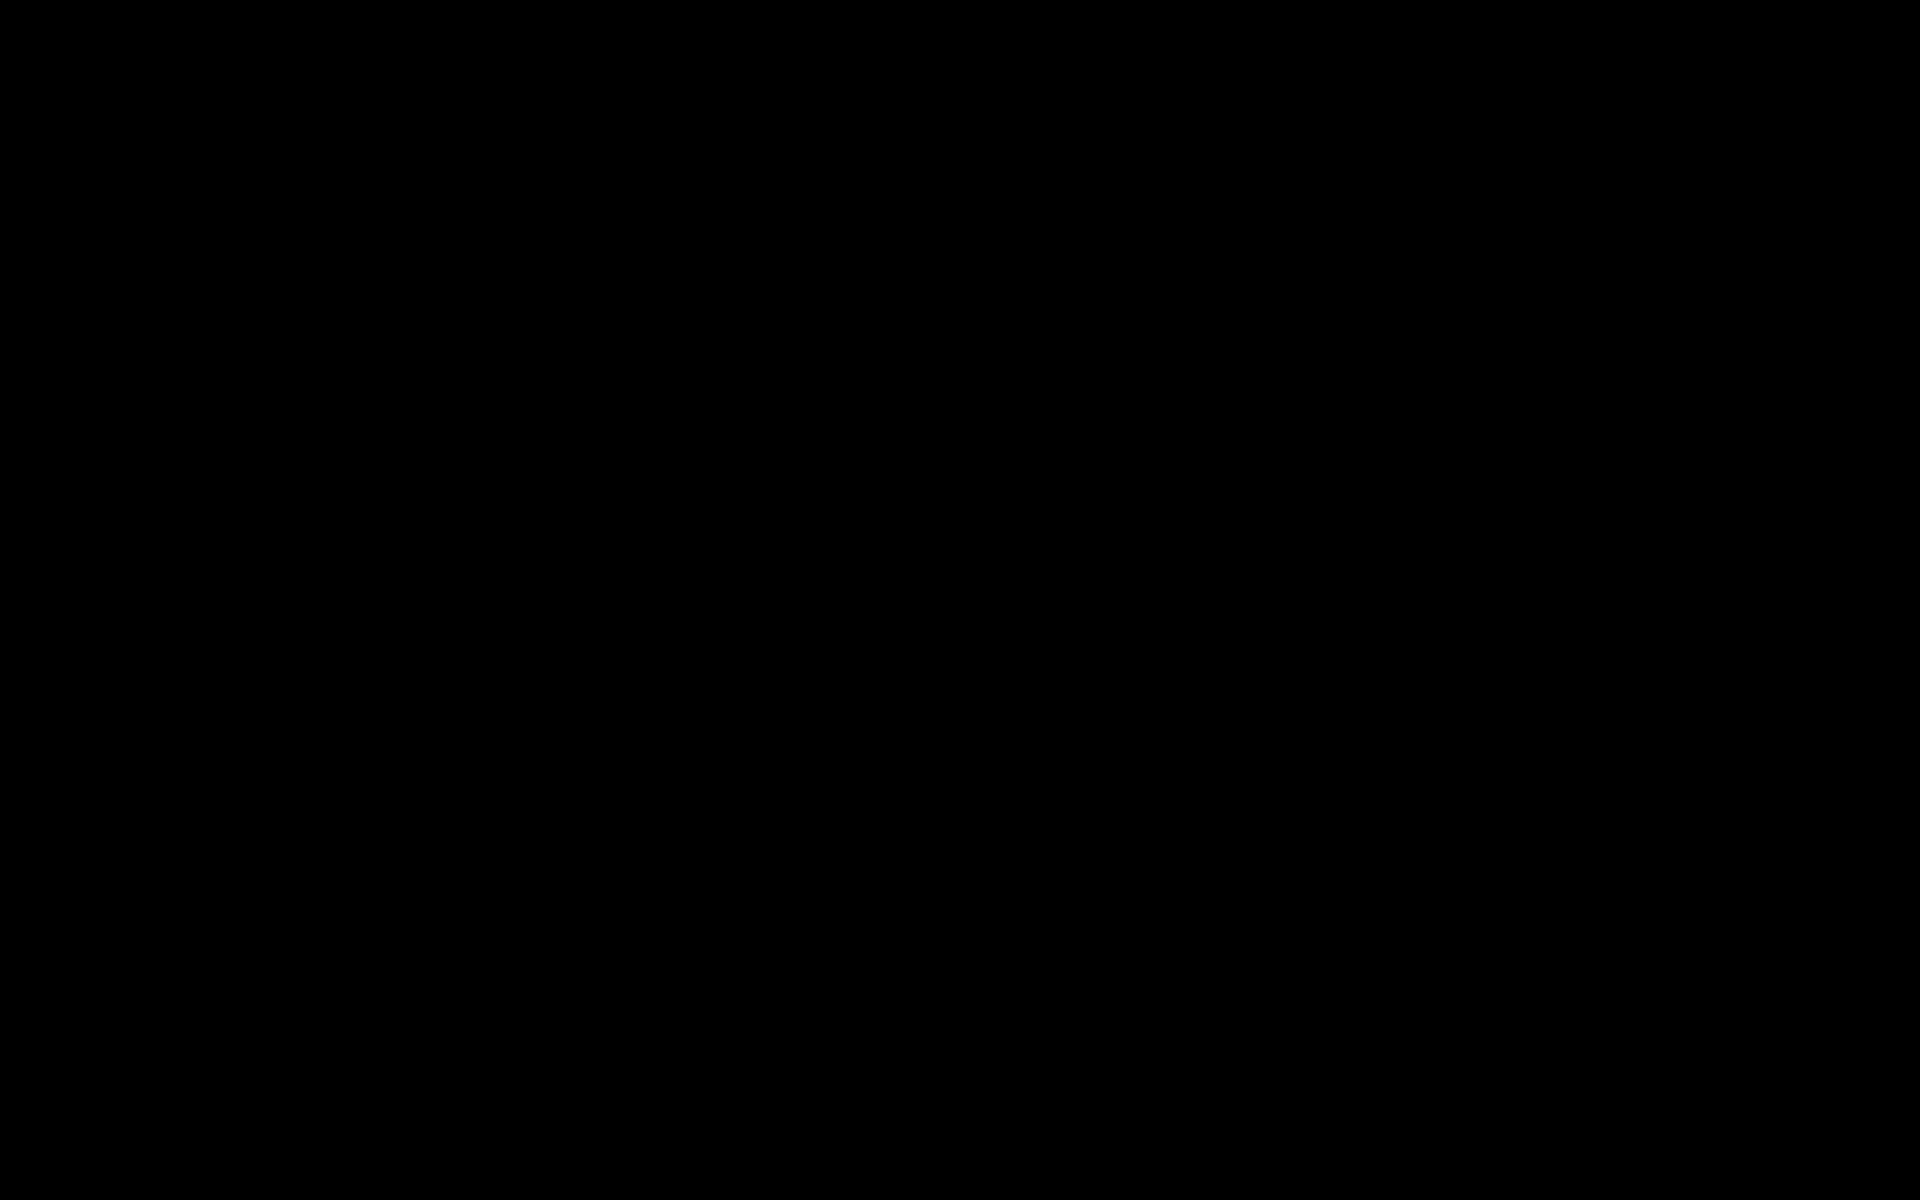

In [14]:
output = Image.fromarray(img_gray3.astype('uint8')) 
output

In [54]:
from scipy import misc
import numpy as np

from scipy.ndimage.filters import convolve
def Canny_detector(img):
    """ Your implementation instead of skimage """
    img_filtered = Gaussian_Smooting_Filter(img,size = (3,3), sigma = 1)
    #img_filtered = Gaussian_Filter_rb0(img,k_size = (3,3), sigma = 1)
    #img_filtered = median_filter(img, filter_size = 3)
    #img_filtered = sharpen_filter(img)
    grad, theta = sobel_filter(img_filtered)
    img_nms = non_max_suppression(grad, theta)
    img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.03, highThresholdRatio=0.12)
    img_final = hysteresis(img_thresh, weak, strong=strong)
    #img_new = np.clip(img_final, 0, 255)  
    output = Image.fromarray(img_final.astype('uint8')) 
    return output

C:\Users\chris\AppData\Local\Temp\ipykernel_7268\3621049772.py:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


In [77]:
def Canny_detector2(img):
    """ Your implementation instead of skimage """
    img_filtered = Gaussian_Smooting_Filter(img,size = (3,3), sigma = 1)
    #img_filtered = Gaussian_Filter_rb0(img,k_size = (3,3), sigma = 1)
    #img_filtered = median_filter(img, filter_size = 3)
    #img_filtered = sharpen_filter(img)
    grad, theta = sobel_filter(img_filtered)
    #img_nms = non_max_suppression(grad, theta)
    img_thresh, weak, strong = threshold(grad, lowThresholdRatio=0.03, highThresholdRatio=0.12)
    #img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.03, highThresholdRatio=0.12)
    img_final = hysteresis(img_thresh, weak, strong=strong)
    #img_new = np.clip(img_final, 0, 255)  
    output = Image.fromarray(img_final.astype('uint8')) 
    return output

# blur filter

In [17]:
img_filtered = median_filter(img_gray0,3)
#output = Image.fromarray(img_filtered.astype('uint8')) 
#output
img_filtered

array([[0.52702196, 0.60719529, 0.59368863, ..., 0.63184157, 0.52702196,
        0.        ],
       [0.60580353, 0.60719529, 0.60719529, ..., 0.63184157, 0.63184157,
        0.        ],
       [0.59595137, 0.60719529, 0.59790078, ..., 0.62877529, 0.52702196,
        0.        ],
       ...,
       [0.1651902 , 0.16965451, 0.17359882, ..., 0.32239333, 0.33209569,
        0.        ],
       [0.1553749 , 0.16965451, 0.16965451, ..., 0.3508702 , 0.35808745,
        0.        ],
       [0.        , 0.14645333, 0.15673608, ..., 0.3508702 , 0.35808745,
        0.        ]])

In [18]:
img_filtered = sharpen_filter(img_gray0)
#output = Image.fromarray(img_filtered.astype('uint8')) 
img_filtered

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06787874, 0.06883956, ..., 0.07577407, 0.08060688,
        0.        ],
       [0.        , 0.06781495, 0.07133821, ..., 0.09401451, 0.10282937,
        0.        ],
       ...,
       [0.        , 0.01567891, 0.01954932, ..., 0.0387681 , 0.04149647,
        0.        ],
       [0.        , 0.01349102, 0.02012619, ..., 0.04112357, 0.04390105,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
img_filtered = Gaussian_Smooting_Filter(img_gray0,size = (3,3), sigma=1 )
img_filtered

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.47334598, 0.47024687, ..., 0.49741372, 0.47303531,
        0.        ],
       [0.        , 0.47142764, 0.46833839, ..., 0.46222404, 0.42750279,
        0.        ],
       ...,
       [0.        , 0.13075904, 0.1340358 , ..., 0.25113078, 0.26291757,
        0.        ],
       [0.        , 0.12749392, 0.13098654, ..., 0.26946659, 0.27802923,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
img_filtered = Gaussian_Filter_rb0(img_gray0,k_size = (3,3), sigma=1 )
img_filtered

array([[0.47334598, 0.47024687, 0.46729302, ..., 0.47303531, 0.        ,
        0.        ],
       [0.47142764, 0.46833839, 0.46651984, ..., 0.42750279, 0.        ,
        0.        ],
       [0.46696999, 0.46442557, 0.46375763, ..., 0.31571234, 0.        ,
        0.        ],
       ...,
       [0.12749392, 0.13098654, 0.13153478, ..., 0.27802923, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
img_filtered1 = Gaussian_Smooting_Filter(img_gray1,size = (3,3), sigma=1 )
#img_filtered1

In [22]:
img_filtered2 = Gaussian_Smooting_Filter(img_gray2,size = (3,3), sigma=1 )
#img_filtered2

In [23]:
img_filtered3 = Gaussian_Smooting_Filter(img_gray3,size = (3,3), sigma=1 )
#img_filtered3

# sobel filter


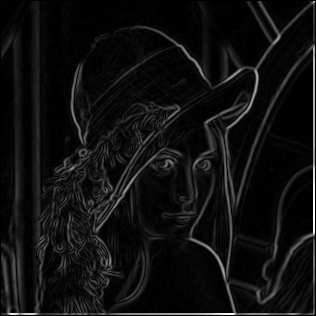

In [24]:
grad,theta= sobel_filter(img_filtered)
output = Image.fromarray(grad.astype('uint8')) 
output
#grad
#theta

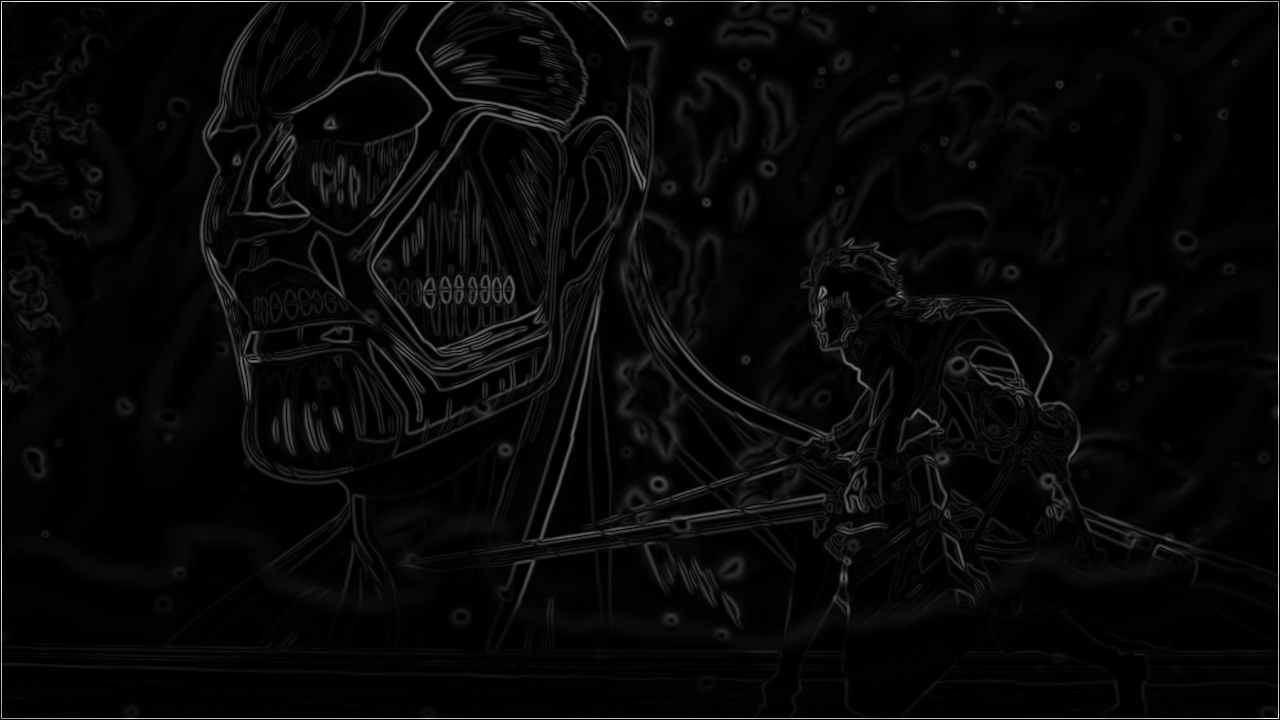

In [25]:
grad1,theta1= sobel_filter(img_filtered1)
output = Image.fromarray(grad1.astype('uint8')) 
output

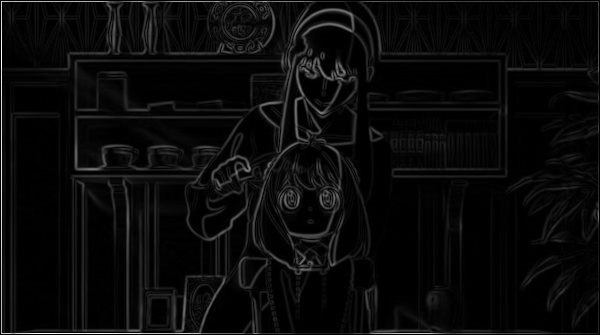

In [26]:
grad2,theta2= sobel_filter(img_filtered2)
output = Image.fromarray(grad2.astype('uint8')) 
output

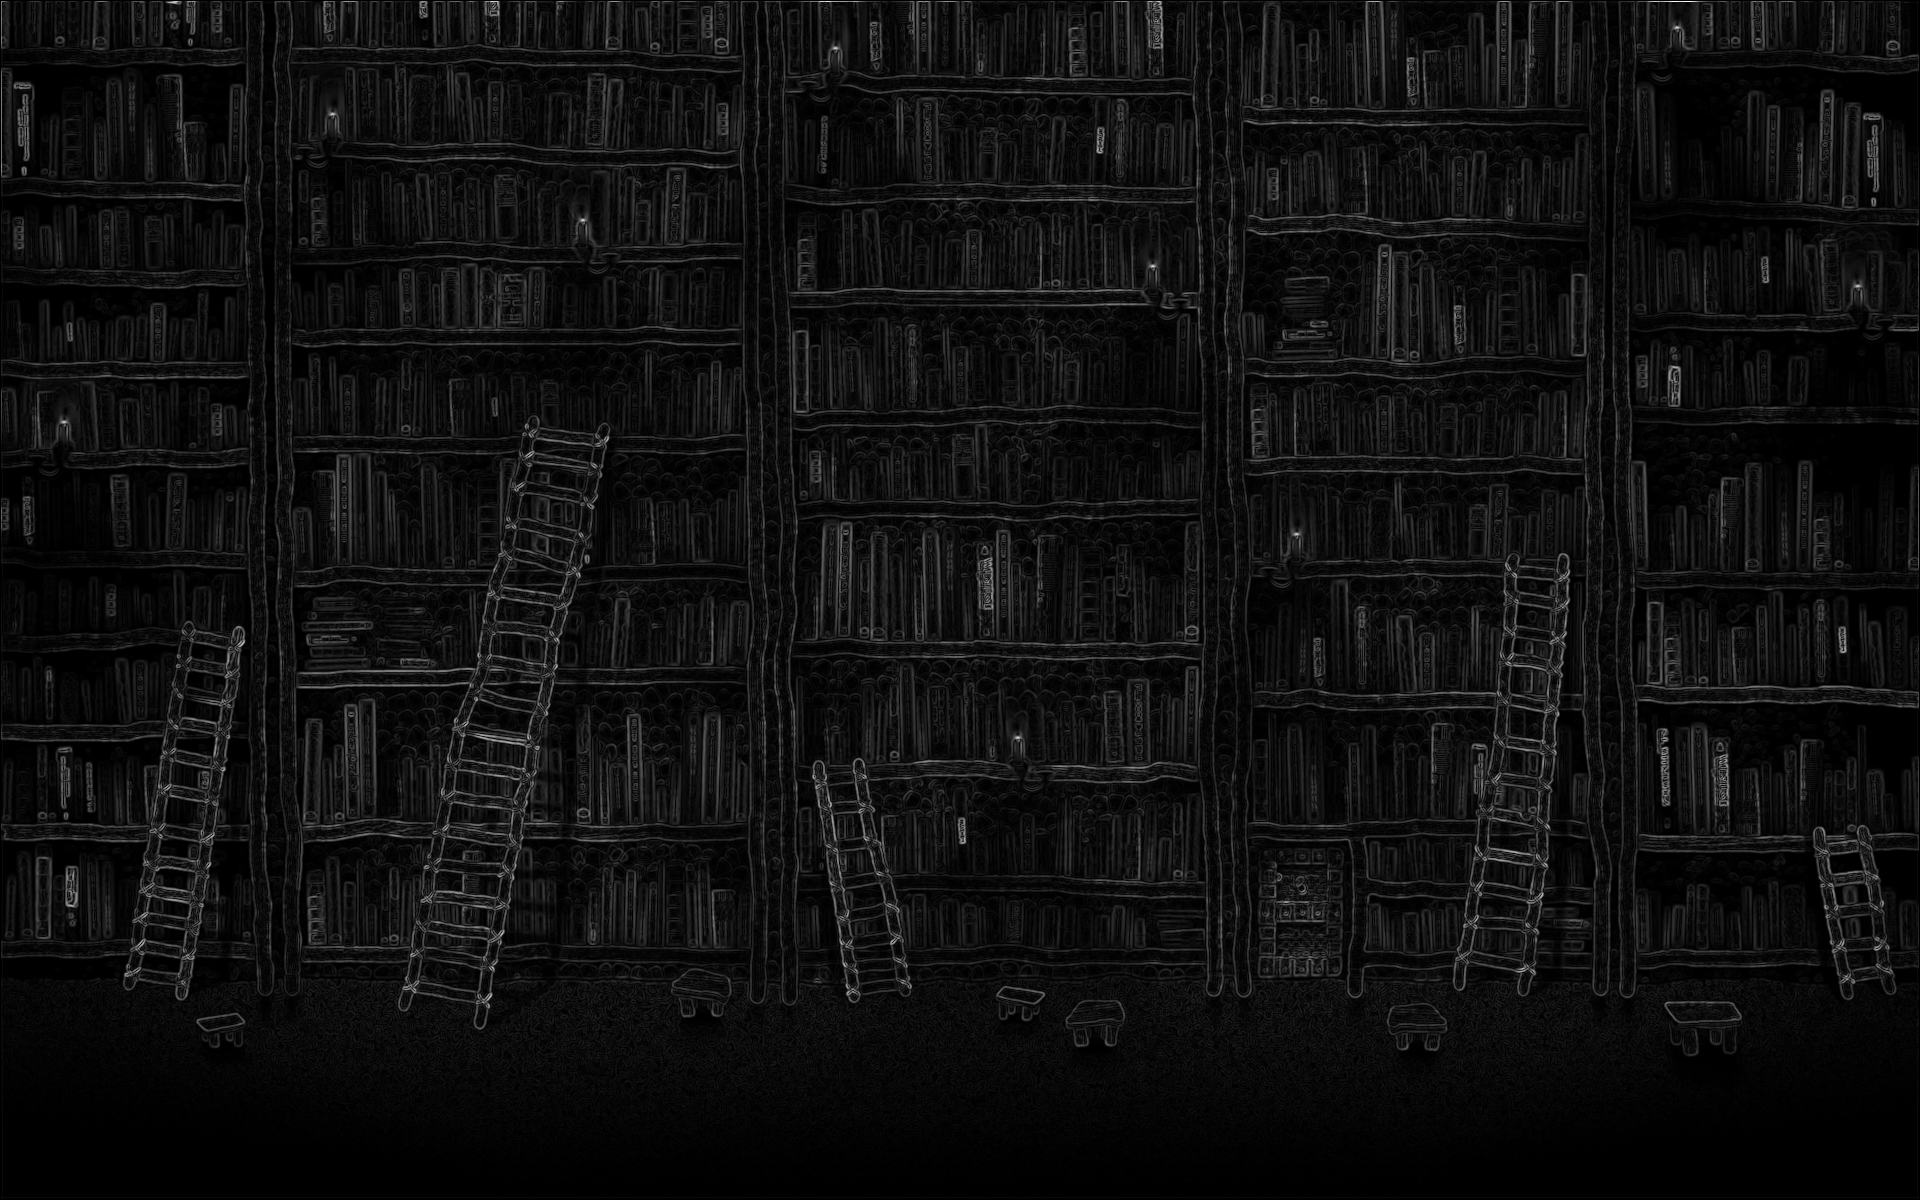

In [27]:
grad3,theta3= sobel_filter(img_filtered3)
output = Image.fromarray(grad3.astype('uint8')) 
output

# nms

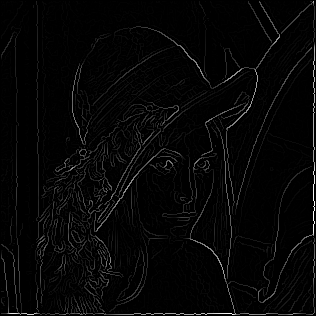

In [28]:
img_nms = non_max_suppression(grad, theta)
output1 = Image.fromarray(img_nms.astype('uint8')) 
output1

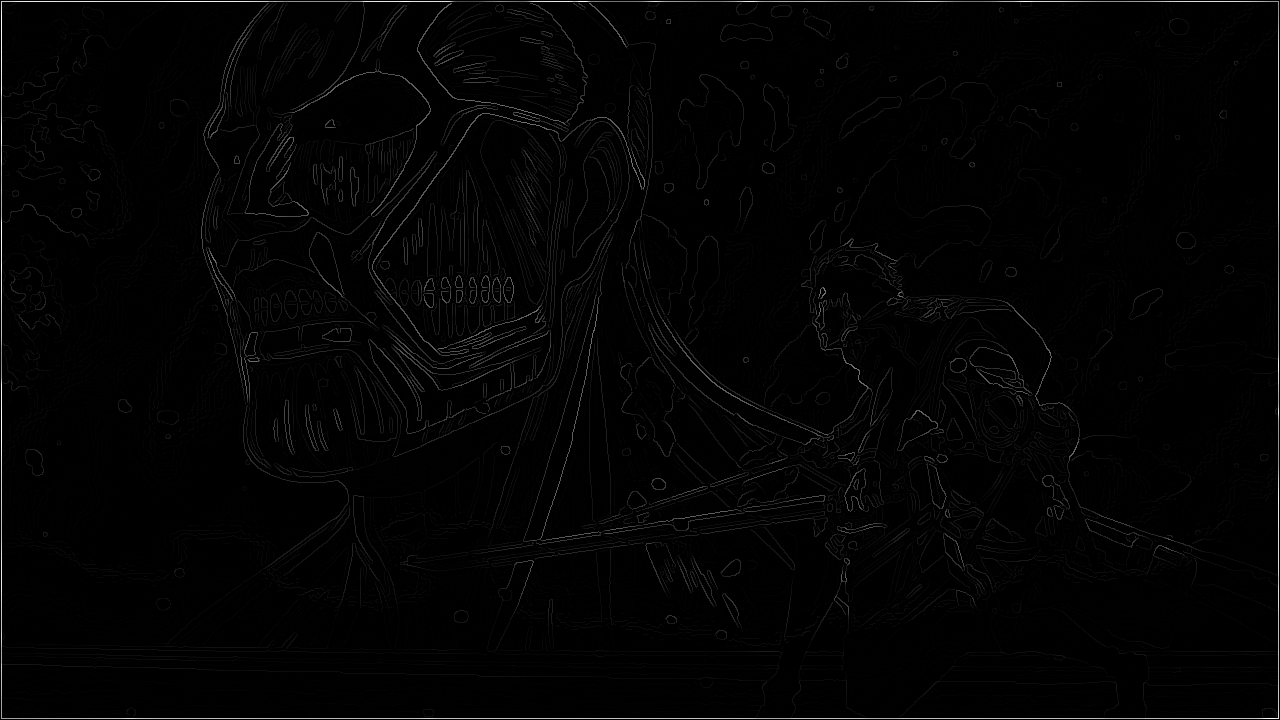

In [29]:
img_nms1 = non_max_suppression(grad1, theta1)
output1 = Image.fromarray(img_nms1.astype('uint8')) 
output1

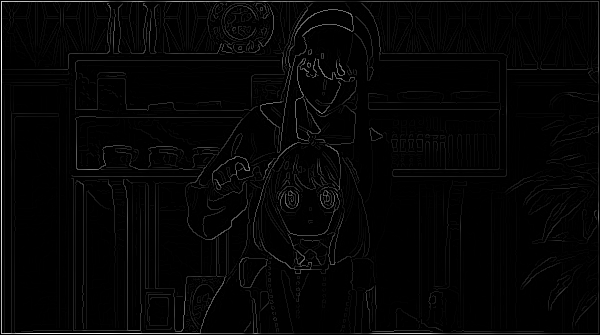

In [30]:
img_nms2 = non_max_suppression(grad2, theta2)
output1 = Image.fromarray(img_nms2.astype('uint8')) 
output1

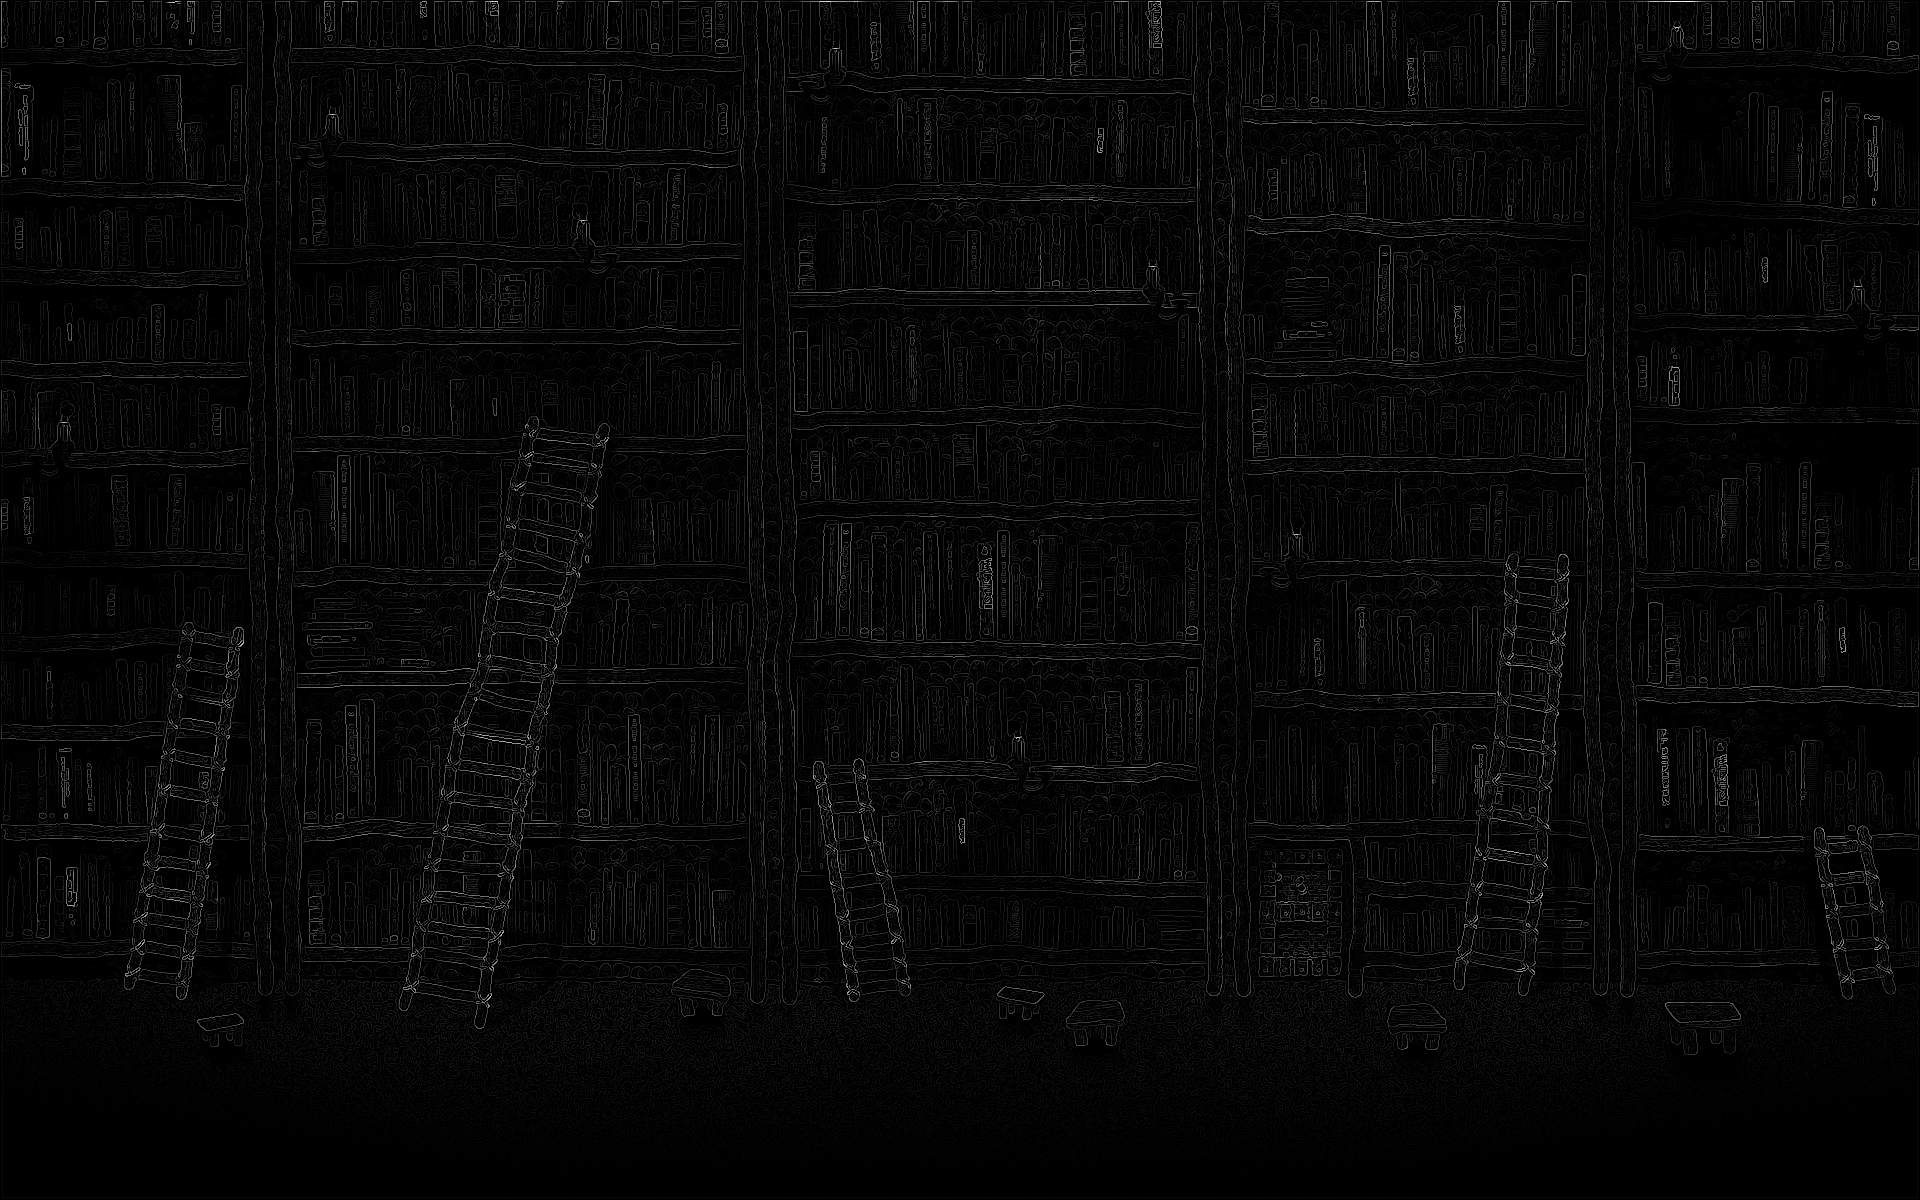

In [31]:
img_nms3 = non_max_suppression(grad3, theta3)
output1 = Image.fromarray(img_nms3.astype('uint8')) 
output1

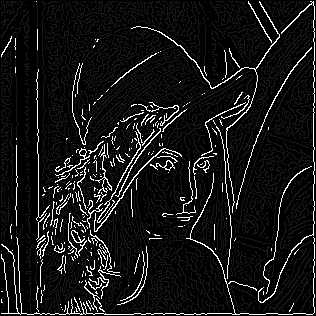

In [32]:
img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.03, highThresholdRatio=0.12)
output2 = Image.fromarray(img_thresh.astype('uint8')) 
output2

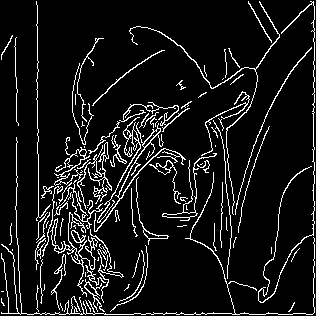

In [33]:
img_final = hysteresis(img_thresh, weak, strong=strong)
output = Image.fromarray(img_final.astype('uint8')) 
output

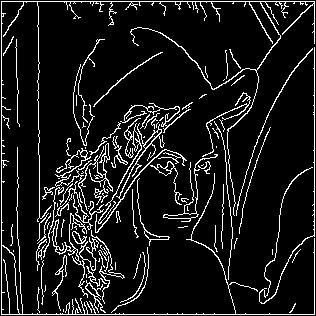

In [34]:
Canny_detector(img_gray0)

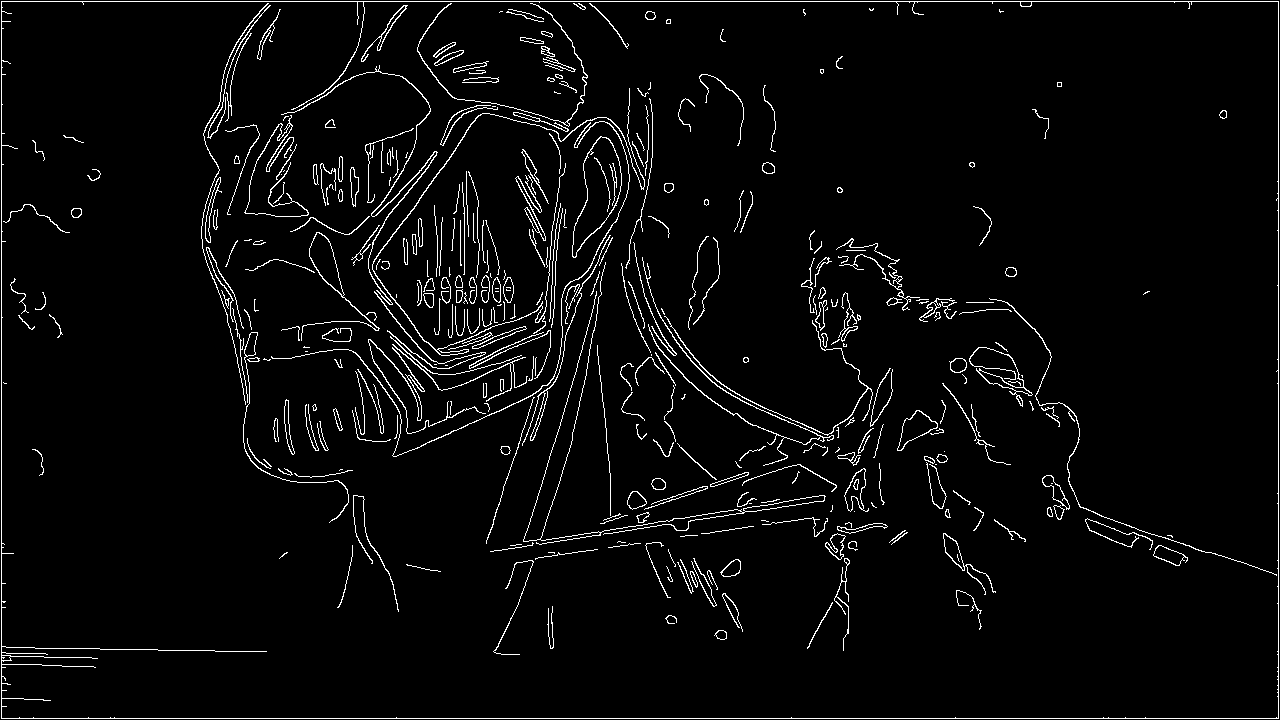

In [35]:
Canny_detector(img_gray1)

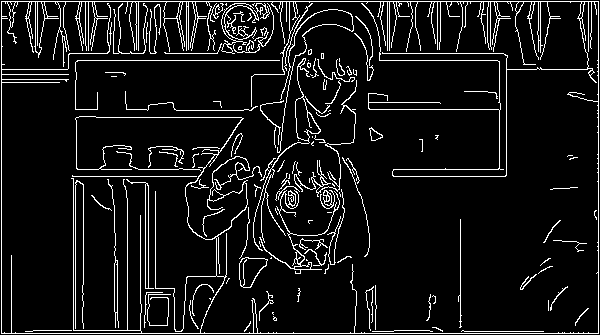

In [36]:
Canny_detector(img_gray2)

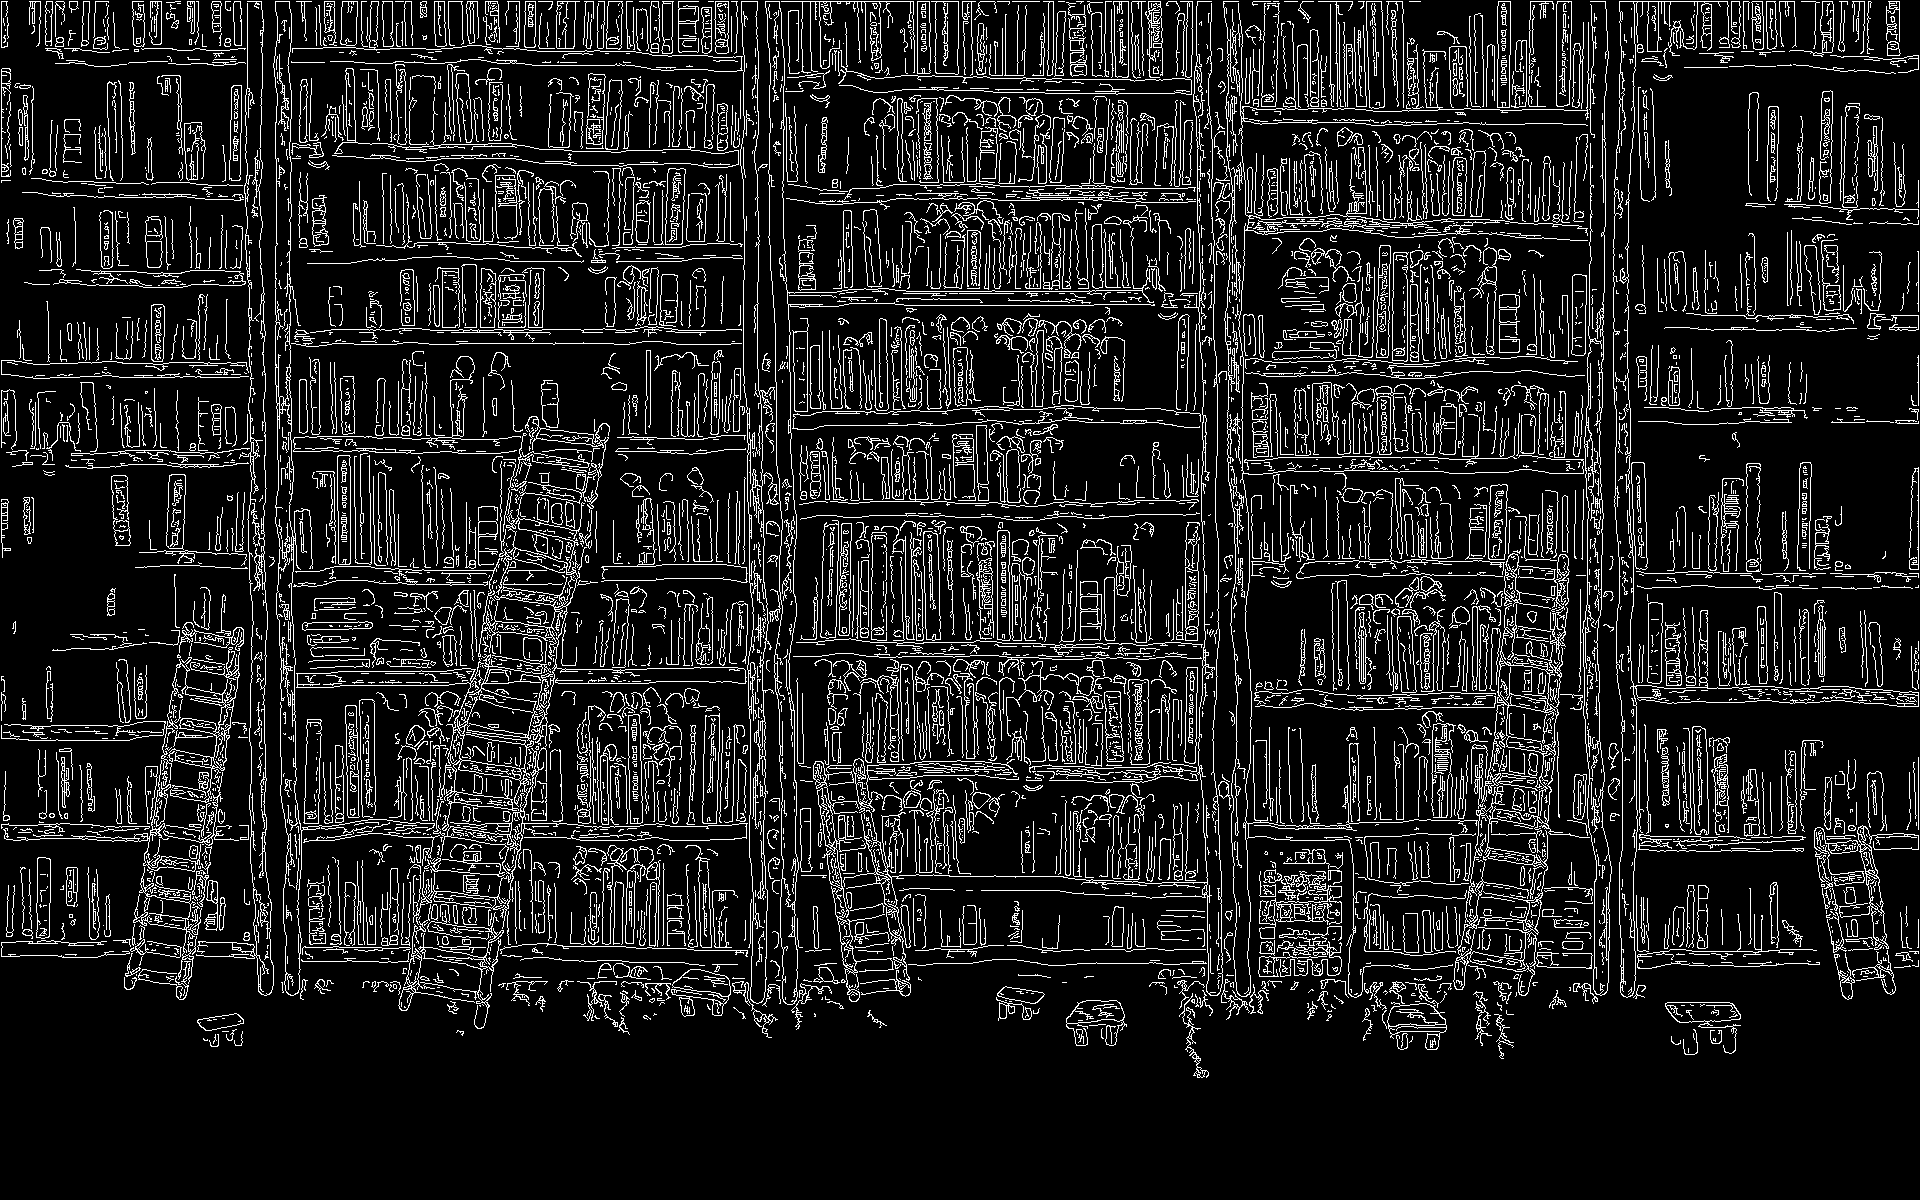

In [37]:
Canny_detector(img_gray3)

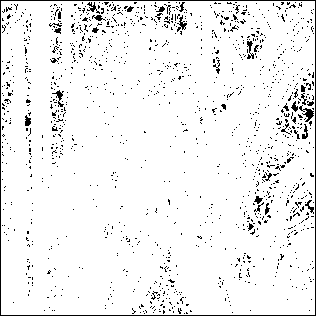

In [78]:
Canny_detector2(img_gray0)

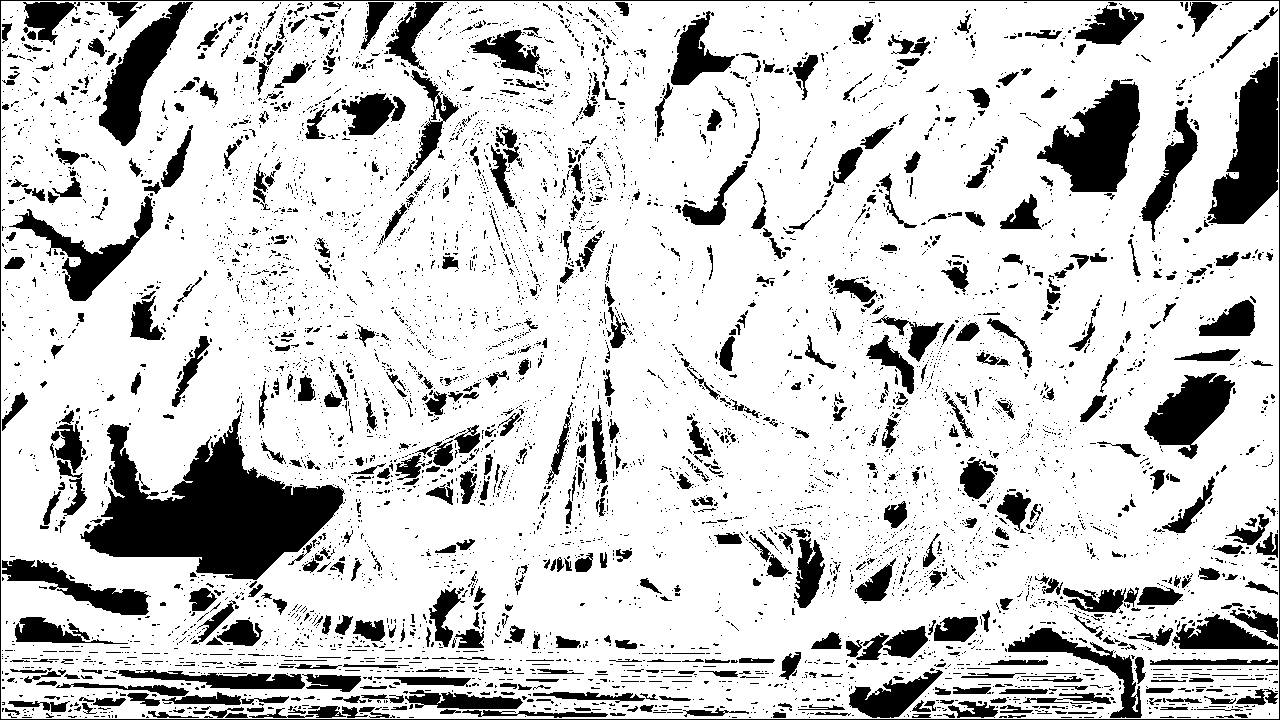

In [79]:
Canny_detector2(img_gray1)

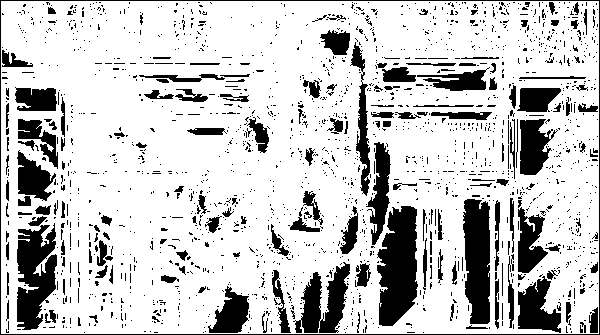

In [80]:
Canny_detector2(img_gray2)

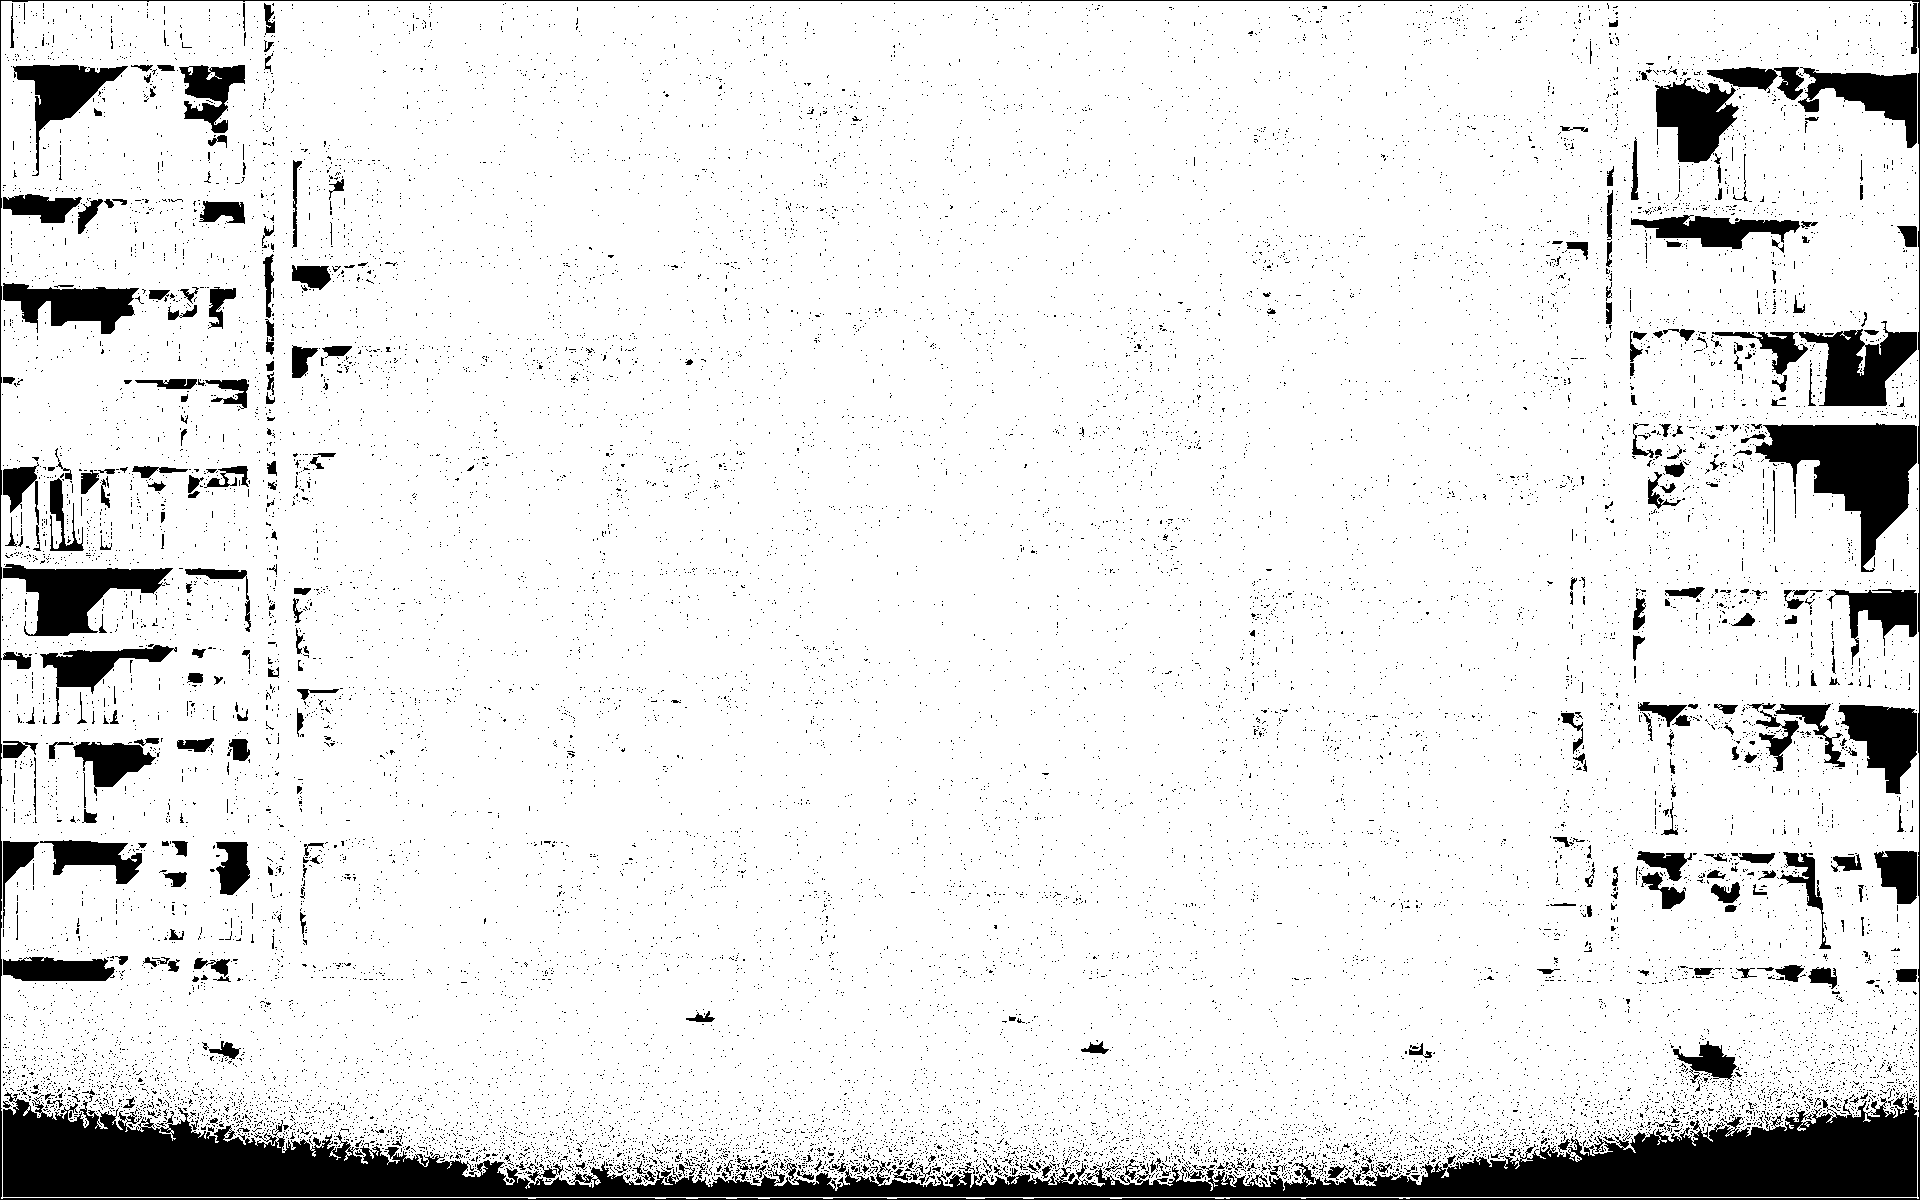

In [81]:
Canny_detector2(img_gray3)

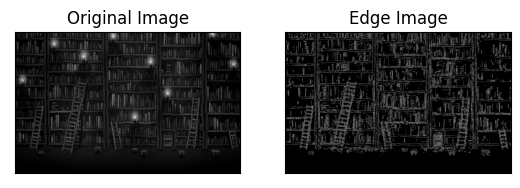

In [76]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('dark_book.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


#images.append(Image.open('lena.jpg'))
#images.append(Image.open('giant.jpg'))
#images.append(Image.open('spy.jpg'))
#images.append(Image.open('dark_book.jpg'))